In [1]:
# load packages
import prepare as p
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import tarfile
from six.moves import urllib

#plotly

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# plt.rcParams['axes.labelsize'] = 14
# plt.rcParams['xtick.labelsize'] = 12
# plt.rcParams['ytick.labelsize'] = 12

#load data
df = p.loadData("alldata.csv", clean=False, alldata=True)
df.head()

,postalcode,contact,dmc,sale,lengthinmin,month,dayofweek,hour,purpose,latitude,longitude
0,CV9,False,False,False,0.080017,10,5,20,charity,52.5844,-1.55908
1,CV9,False,False,False,0.119995,10,5,17,charity,52.5844,-1.55908
2,CV9,False,False,False,0.020004,10,4,17,charity,52.5844,-1.55908
3,CV9,True,True,False,0.569824,10,3,18,charity,52.5844,-1.55908
4,CV9,False,False,False,0.199951,10,3,10,charity,52.5844,-1.55908


In [2]:
# summary stats for alldata
df.describe()

,lengthinmin,month,dayofweek,hour,latitude,longitude
count,1.398091e+07,1.398091e+07,1.398091e+07,1.398091e+07,1.398091e+07,1.398091e+07
mean,NaN,5.595599e+00,3.113015e+00,1.296458e+01,5.246556e+01,-1.664901e+00
std,NaN,2.994448e+00,1.451212e+00,2.701900e+00,1.416992e+00,1.550453e+00
min,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,4.919950e+01,-7.826240e+00
25%,4.998779e-02,3.000000e+00,2.000000e+00,1.100000e+01,5.147800e+01,-2.749690e+00
50%,1.300049e-01,5.000000e+00,3.000000e+00,1.300000e+01,5.198050e+01,-1.547480e+00
75%,4.499512e-01,8.000000e+00,4.000000e+00,1.500000e+01,5.338130e+01,-3.764600e-01
max,5.385000e+02,1.000000e+01,7.000000e+00,2.300000e+01,6.031160e+01,1.733300e+00


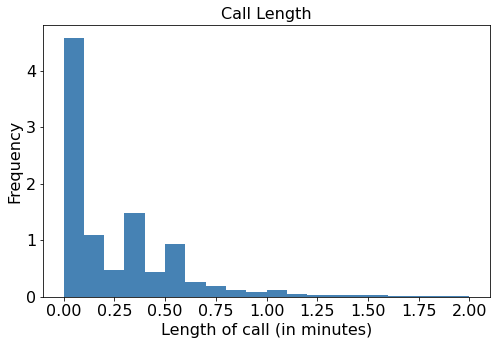

In [3]:
# histogram of length of call in minutes
fig = plt.figure(figsize = (8,5))
plt.hist(df.lengthinmin, density=True, bins=20, range=[0,2], color = "steelblue")
plt.xlabel("Length of call (in minutes)", fontsize = 16)
plt.ylabel("Frequency",  fontsize = 16)
plt.title("Call Length",  fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)


#plt.savefig("Call Length.jpeg", format=jpeg)\

plt.savefig('fig1.png')

In [4]:
# count number of instances of each purpose
purposeCounts = df['purpose'].value_counts()
purposeCounts

homeservices    2919818
finance         2361283
gambling        2250548
health          1781898
charity         1778975
debt             991543
insurance        954796
misc             527401
pension          265831
magazine          83115
surgery           32300
support           30254
family             3123
energy               23
Name: purpose, dtype: int64

In [5]:
# sort by Age (Ascending order)
sort_pur = df.groupby(by=["purpose"]).mean()
pur_mean = sort_pur.sort_values('contact',ascending=True)
pur_mean

,contact,dmc,sale,lengthinmin,month,dayofweek,hour,latitude,longitude
purpose,,,,,,,,,
finance,0.051401,0.038691,0.008377,0.231689,4.231541,3.113155,12.349088,52.849532,-1.763924
insurance,0.141408,0.129206,0.017082,0.622559,5.486203,3.075461,12.397549,52.660059,-1.845193
debt,0.141836,0.091078,0.002356,0.269287,9.056594,2.939718,13.039691,52.799737,-1.695949
homeservices,0.161249,0.101435,0.003392,0.271729,4.735611,2.951875,13.041574,51.695282,-1.944051
charity,0.187831,0.154508,0.013436,0.509766,6.966072,3.392191,14.309501,52.411721,-1.457825
pension,0.192649,0.126584,0.001102,0.247681,8.800663,3.062352,12.088774,52.795552,-1.394206
misc,0.244998,0.182745,0.019198,0.549316,9.190434,3.185925,13.864886,52.531271,-1.481518
health,0.289491,0.157542,0.131729,1.631836,4.694960,3.298822,12.639630,52.446832,-1.231632
surgery,0.331734,0.256842,0.017647,0.685059,5.988514,2.912353,12.515697,52.950419,-1.690427


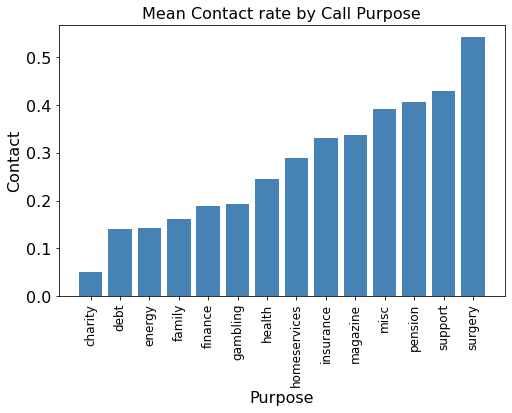

In [6]:
# mean contact by purpose
x = df.purpose.unique()
f,ax = plt.subplots(figsize = (8,5))
plt.bar(x,pur_mean.contact, color = "steelblue")

plt.xlabel("Purpose", fontsize = 16)
plt.ylabel("Contact", fontsize = 16)
plt.title("Mean Contact rate by Call Purpose",fontsize = 16)
plt.xticks(rotation=90)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 16)
plt.savefig('fig2.png')

In [7]:
# count contact by purpose
# df.groupby(by=["purpose","sale"]).count().plot(kind = 'bar')
df.groupby(by=["purpose"]).count()

,postalcode,contact,dmc,sale,lengthinmin,month,dayofweek,hour,latitude,longitude
purpose,,,,,,,,,,
charity,1778975,1778975,1778975,1778975,1778975,1778975,1778975,1778975,1778975,1778975
debt,991543,991543,991543,991543,991543,991543,991543,991543,991543,991543
energy,23,23,23,23,23,23,23,23,23,23
family,3123,3123,3123,3123,3123,3123,3123,3123,3123,3123
finance,2361283,2361283,2361283,2361283,2361283,2361283,2361283,2361283,2361283,2361283
gambling,2250548,2250548,2250548,2250548,2250548,2250548,2250548,2250548,2250548,2250548
health,1781898,1781898,1781898,1781898,1781898,1781898,1781898,1781898,1781898,1781898
homeservices,2919818,2919818,2919818,2919818,2919818,2919818,2919818,2919818,2919818,2919818
insurance,954796,954796,954796,954796,954796,954796,954796,954796,954796,954796


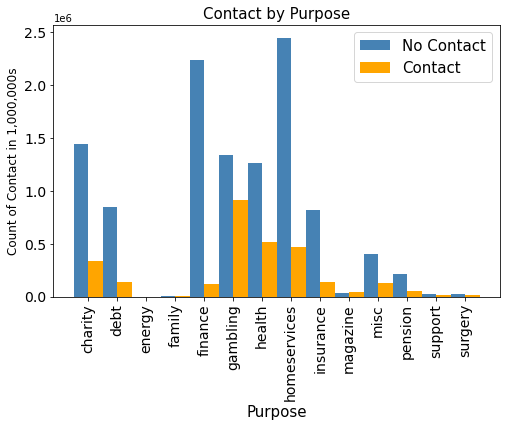

In [10]:
# count of contact or no contact by Purpose
df_contact = df[["purpose", "contact"]]

y1 = df_contact[df.contact==False].groupby('purpose').count().reset_index()
y2 =  df_contact[df.contact==True].groupby('purpose').count().reset_index()
width = 0.5


# y1 = list(y1.sale)
# y2 = list(y2.sale)
y1.rename(columns = {"contact": "nocontact"}, inplace= True)
y1.rename(columns = {"contact": "Contact"}, inplace= True)
y = pd.merge(y1, y2, how = "outer")

y = y.fillna(0)

x = list(y.purpose)
x = tuple(x)
y1 = list(y.nocontact)
y2 = list(y.contact)

index= np.arange(len(y.index))

fig = plt.figure(figsize = (8,5))

ax = fig.add_subplot(111)

ax.bar(index, y1, width=width, color = 'steelblue', label = 'No Contact')
ax.bar(index+width, y2, width=width, color = 'orange', label = 'Contact')

ax.set_xlabel('Purpose', fontsize = 15)
ax.set_ylabel('Count of Contact in 1,000,000s', fontsize = 12)
ax.set_xticks(index+width/2)
ax.set_xticklabels(x, rotation='vertical')
ax.legend(fontsize = 15)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.title("Contact by Purpose",fontsize = 15)

fig.savefig('fig7.png')

plt.show()

In [77]:
df_contact = df[["purpose", "contact"]]

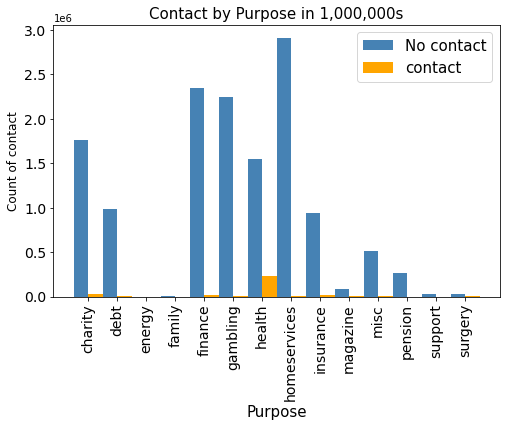

In [119]:
# count of contact or no contact by Purpose
df_contact = df[["purpose", "contact"]]

y1 = df_contact[df.sale==False].groupby('purpose').count().reset_index()
y2 =  df_contact[df.sale==True].groupby('purpose').count().reset_index()

width = 0.5

# y1 = list(y1.sale)
# y2 = list(y2.sale)
y1.rename(columns = {"contact": "nocontact"}, inplace= True)
y1.rename(columns = {"contact": "contact"}, inplace= True)
y = pd.merge(y1, y2, how = "outer")

y = y.fillna(0)

x = list(y.purpose)
x = tuple(x)
y1 = list(y.nocontact)
y2 = list(y.contact)

index= np.arange(len(y.index))

fig = plt.figure(figsize = (8,5))

ax = fig.add_subplot(111)

ax.bar(index, y1, width=width, color = 'steelblue', label = 'No contact')
ax.bar(index+width, y2, width=width, color = 'orange', label = 'contact')

ax.set_xlabel('Purpose',fontsize = 15)
ax.set_ylabel('Count of contact',fontsize = 12)
ax.set_xticks(index+width/2)
ax.set_xticklabels(x, rotation='vertical')
ax.legend(fontsize = 15)

plt.title("Contact by Purpose in 1,000,000s",fontsize = 15)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

fig.savefig('fig8.png')

plt.show()

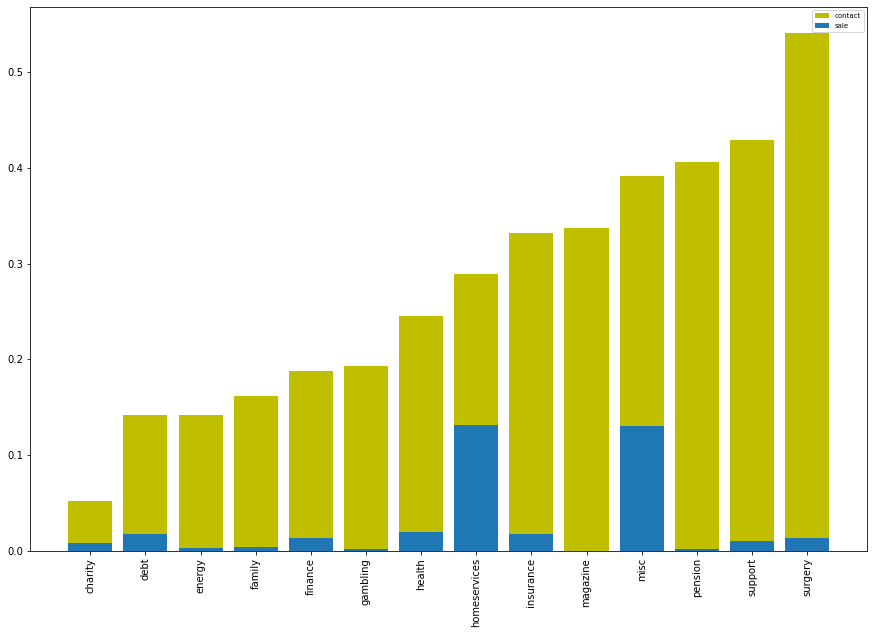

In [79]:
#count of contact and sale by Purpose
x = df.purpose.unique()
f,ax = plt.subplots(figsize = (15,10))
ax.bar(x,pur_mean.contact, color = "y", label= 'contact')
ax.bar(x,pur_mean.sale, label = 'sale')
ax.legend(prop = {'size':7})
ax.set_xticklabels(x, rotation='vertical')

plt.show()
#plt.legend(loc = 'lower left')
#plt.legend(prop = {'size':20}, loc = 'lower left')

In [80]:
# health data by Purpose
df1 = df[(df['purpose'] == 'health')]
df1

# support data by Purpose
df2 = df[(df['purpose'] == 'support')]
df2

,postalcode,contact,dmc,sale,lengthinmin,month,dayofweek,hour,purpose,latitude,longitude
13918354,SN5,True,False,False,0.130005,4,1,12,support,51.5676,-1.839010
13918355,SN5,True,True,False,0.469971,4,5,16,support,51.5676,-1.839010
13918356,SN5,False,False,False,0.020004,4,5,13,support,51.5676,-1.839010
13918357,SN5,False,False,False,0.080017,4,5,10,support,51.5676,-1.839010
13918358,SN5,False,False,False,0.000000,4,4,16,support,51.5676,-1.839010
...,...,...,...,...,...,...,...,...,...,...,...
13948603,WC1E,False,False,False,0.549805,3,3,11,support,51.5207,-0.132407
13948604,PO39,False,False,False,0.170044,3,3,11,support,50.6806,-1.539450
13948605,SN26,False,False,False,0.070007,3,2,17,support,51.6111,-1.785520
13948606,PO35,False,False,False,0.070007,3,2,17,support,50.6878,-1.088670


In [81]:
# # summary stats on health data
df1.describe()

# summary stats on support data
df2.describe()


,lengthinmin,month,dayofweek,hour,latitude,longitude
count,30254.000000,30254.000000,30254.000000,30254.000000,30254.000000,30254.000000
mean,0.384277,3.190058,3.242646,13.540325,51.426768,-0.801905
std,0.592285,0.392353,1.184550,2.610265,0.331281,1.253904
min,0.000000,3.000000,1.000000,8.000000,49.948200,-6.187660
25%,0.080017,3.000000,2.000000,11.000000,51.347500,-1.213880
50%,0.219971,3.000000,3.000000,13.000000,51.488500,-0.331054
75%,0.529785,3.000000,4.000000,16.000000,51.594700,-0.046603
max,24.328125,4.000000,5.000000,19.000000,52.229700,1.429160


In [82]:
#Week to names
days = ["Monday","Tuesday","Wednesday","Thursday", "Friday", "Saturday", "Sunday"]

In [110]:
# # count of sale or no sale by Purpose
# df_contactwk = df[["contact", "dayofweek"]]

# y1 = df_contactwk[df.contact==False].groupby('dayofweek').count().reset_index()
# y2 =  df_contactwk[df.contact==True].groupby('dayofweek').count().reset_index()
# width = 0.3


# # y1 = list(y1.sale)
# # y2 = list(y2.sale)
# y1.rename(columns = {"contact": "nocontact"}, inplace= True)
# y1.rename(columns = {"contact": "contact"}, inplace= True)
# y = pd.merge(y1, y2, how = "outer")

# y = y.fillna(0)

# x = list(y.dayofweek)
# x = tuple(days)
# y1 = list(y.nocontact)
# y2 = list(y.contact)

# index= np.arange(len(y.index))

# fig = plt.figure(figsize = (8,5))

# ax = fig.add_subplot(111)

# ax.bar(index, y1, width=width, color = 'steelblue', label = 'No contact')
# ax.bar(index+width, y2, width=width, color = 'orange', label = 'Contact')


# ax.set_xlabel('Week')
# ax.set_ylabel('Count of Contact')
# ax.set_xticks(index+width/2)
# ax.set_xticklabels(x, rotation = "vertical")
# ax.legend()

# plt.show()

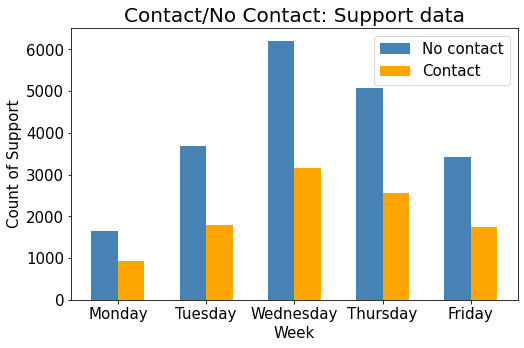

In [117]:
# count of contact or no contact by Support Purpose
df2_contactwk = df2[["contact", "dayofweek"]]

y1 = df2_contactwk[df2.contact==False].groupby('dayofweek').count().reset_index()
y2 =  df2_contactwk[df2.contact==True].groupby('dayofweek').count().reset_index()
width = 0.3


# y1 = list(y1.sale)
# y2 = list(y2.sale)
y1.rename(columns = {"contact": "nocontact"}, inplace= True)
y1.rename(columns = {"contact": "contact"}, inplace= True)
y = pd.merge(y1, y2, how = "outer")

y = y.fillna(0)

x = list(y.dayofweek)
x = tuple(days)
y1 = list(y.nocontact)
y2 = list(y.contact)

index= np.arange(len(y.index))

fig = plt.figure(figsize = (8,5))

ax = fig.add_subplot(111)

ax.bar(index, y1, width=width, color = 'steelblue', label = 'No contact')
ax.bar(index+width, y2, width=width, color = 'orange', label = 'Contact')

plt.title("Contact/No Contact: Support data", fontsize = 20)
ax.set_xlabel('Week', fontsize = 15)
ax.set_ylabel('Count of Support', fontsize = 15)
ax.set_xticks(index+width/2)
ax.set_xticklabels(x)
ax.legend(fontsize = 15)


plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show()

fig.savefig('fig4.png')

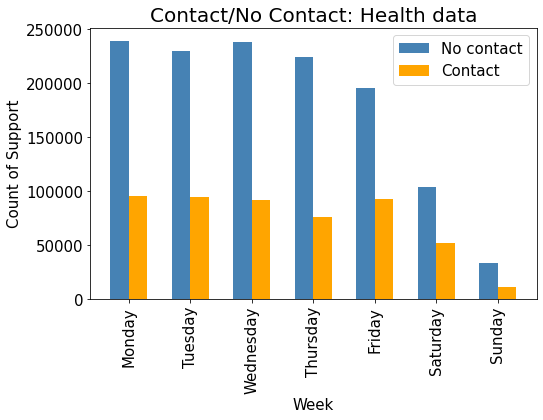

In [116]:
# count of contact or no contact by health Purpose
df1_contactwk = df1[["contact", "dayofweek"]]

y1 = df1_contactwk[df1.contact==False].groupby('dayofweek').count().reset_index()
y2 =  df1_contactwk[df1.contact==True].groupby('dayofweek').count().reset_index()
width = 0.3


# y1 = list(y1.sale)
# y2 = list(y2.sale)
y1.rename(columns = {"contact": "nocontact"}, inplace= True)
y1.rename(columns = {"contact": "contact"}, inplace= True)
y = pd.merge(y1, y2, how = "outer")

y = y.fillna(0)

x = list(y.dayofweek)
x = tuple(days)
y1 = list(y.nocontact)
y2 = list(y.contact)

index= np.arange(len(y.index))

fig = plt.figure(figsize = (8,5))

ax = fig.add_subplot(111)

ax.bar(index, y1, width=width, color = 'steelblue', label = 'No contact')
ax.bar(index+width, y2, width=width, color = 'orange', label = 'Contact')

plt.title("Contact/No Contact: Health data",fontsize = 20)
ax.set_xlabel('Week', fontsize = 15)
ax.set_ylabel('Count of Support',fontsize = 15)
ax.set_xticks(index+width/2)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)


# ax.set_yticks(fontsize = 15)


ax.set_xticklabels(x, rotation = 'vertical')
ax.legend(fontsize = 15)

plt.show()

fig.savefig('fig3.png')
#ax.savefig("Number of Contact/No Contact for Health data.png")
#plt.savefig('Mean Contact rate by Call Purpose.png')



In [86]:
#months to names
months = ["Jan","Feb","Mar","Apr", "May", "Jun", "Jul","Aug","Sep","Oct","Nov","Dec"]

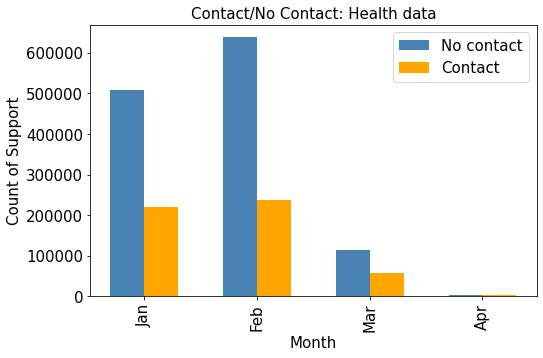

In [87]:
# count of contact or no contact by health Purpose
df1_contactmon = df1[["contact", "month"]]

y1 = df1_contactmon[df1.contact==False].groupby('month').count().reset_index()
y2 =  df1_contactmon[df1.contact==True].groupby('month').count().reset_index()
width = 0.3


# y1 = list(y1.sale)
# y2 = list(y2.sale)
y1.rename(columns = {"contact": "nocontact"}, inplace= True)
y1.rename(columns = {"contact": "contact"}, inplace= True)
y = pd.merge(y1, y2, how = "outer")

y = y.fillna(0)

x = list(y.month)
x = tuple(months)
y1 = list(y.nocontact)
y2 = list(y.contact)

index= np.arange(len(y.index))

fig = plt.figure(figsize = (8,5))

ax = fig.add_subplot(111)

ax.bar(index, y1, width=width, color = 'steelblue', label = 'No contact')
ax.bar(index+width, y2, width=width, color = 'orange', label = 'Contact')

plt.title("Contact/No Contact: Health data", fontsize = 15)
ax.set_xlabel('Month', fontsize = 15)
ax.set_ylabel('Count of Support', fontsize = 15)
ax.set_xticks(index+width/2)
ax.set_xticklabels(x, rotation = 'vertical')
ax.legend(fontsize = 15)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)


fig.savefig('fig5.png')
#ax.savefig("Number of Contact/No Contact for Health data.png")
#plt.savefig('Mean Contact rate by Call Purpose.png')




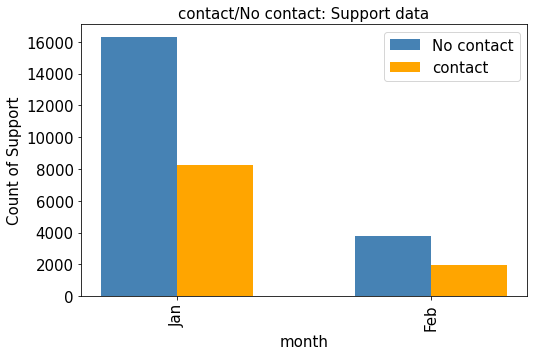

In [88]:
# count of contact or no contact by support Purpose
df2_contactmon = df2[["contact", "month"]]

y1 = df2_contactmon[df2.contact==False].groupby('month').count().reset_index()
y2 =  df2_contactmon[df2.contact==True].groupby('month').count().reset_index()
width = 0.3


# y1 = list(y1.sale)
# y2 = list(y2.sale)
y1.rename(columns = {"contact": "nocontact"}, inplace= True)
y1.rename(columns = {"contact": "contact"}, inplace= True)
y = pd.merge(y1, y2, how = "outer")

y = y.fillna(0)

x = list(y.month)
x = tuple(months)
y1 = list(y.nocontact)
y2 = list(y.contact)

index= np.arange(len(y.index))

fig = plt.figure(figsize = (8,5))

ax = fig.add_subplot(111)

ax.bar(index, y1, width=width, color = 'steelblue', label = 'No contact')
ax.bar(index+width, y2, width=width, color = 'orange', label = 'contact')

plt.title("contact/No contact: Support data", fontsize = 15)
ax.set_xlabel('month', fontsize = 15)
ax.set_ylabel('Count of Support', fontsize = 15)
ax.set_xticks(index+width/2)
ax.set_xticklabels(x, rotation = 'vertical')
ax.legend(fontsize = 15)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show()

fig.savefig('fig6.png')
#ax.savefig("Number of Contact/No Contact for Health data.png")
#plt.savefig('Mean Contact rate by Call Purpose.png')


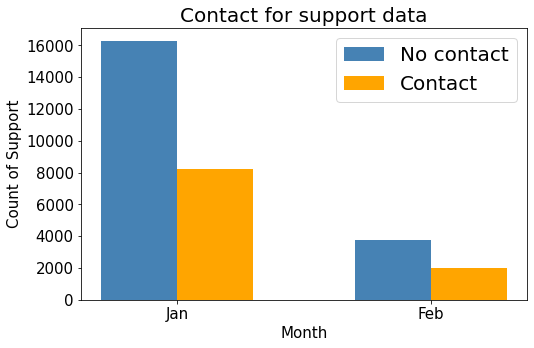

In [89]:
# count of contact or no contact by Support Purpose
df2_contactmon = df2[["contact", "month"]]

#mon = df[df.contact == True].groupby(by=["month"])


y1 = df2_contactmon[df2_contactmon.contact==False].groupby('month').count().reset_index()
y2 =  df2_contactmon[df2_contactmon.contact==True].groupby('month').count().reset_index()
width = 0.3


# y1 = list(y1.sale)
# y2 = list(y2.sale)
y1.rename(columns = {"contact": "nocontact"}, inplace= True)
y1.rename(columns = {"contact": "contact"}, inplace= True)
y = pd.merge(y1, y2, how = "outer")

y = y.fillna(0)

x = list(y.month)
x = tuple(months)
y1 = list(y.nocontact)
y2 = list(y.contact)

index= np.arange(len(y.index))

fig = plt.figure(figsize = (8,5))

ax = fig.add_subplot(111)

ax.bar(index, y1, width=width, color = 'steelblue', label = 'No contact')
ax.bar(index+width, y2, width=width, color = 'orange', label = 'Contact')

plt.title("Contact for support data", fontsize = 20)
ax.set_xlabel('Month', fontsize = 15)
ax.set_ylabel('Count of Support', fontsize = 15)
ax.set_xticks(index+width/2)
ax.set_xticklabels(x)
ax.legend(fontsize = 20)


plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show()


In [90]:
#df.groupby(by=["dayofweek"]).count()["contact"]
#df.groupby(by=["month"]).count()["contact"]

In [91]:
#mon = df2[df2.contact == True].groupby(by=["month"])

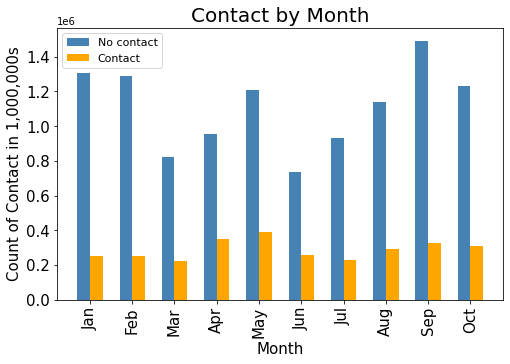

In [118]:
# count of contact or no contact by Purpose by MONTH
df_contactmon = df[["contact", "month"]]

y1 = df_contactmon[df.contact==False].groupby('month').count().reset_index()
y2 =  df_contactmon[df.contact==True].groupby('month').count().reset_index()
width = 0.3


# y1 = list(y1.sale)
# y2 = list(y2.sale)
y1.rename(columns = {"contact": "nocontact"}, inplace= True)
y1.rename(columns = {"contact": "contact"}, inplace= True)
y = pd.merge(y1, y2, how = "outer")

y = y.fillna(0)

x = list(y.month)
x = tuple(months)
y1 = list(y.nocontact)
y2 = list(y.contact)

index= np.arange(len(y.index))

fig = plt.figure(figsize = (8,5))

ax = fig.add_subplot(111)

ax.bar(index, y1, width=width, color = 'steelblue', label = 'No contact')
ax.bar(index+width, y2, width=width, color = 'orange', label = 'Contact')

plt.title("Contact by Month", fontsize = 20)

ax.set_xlabel('Month', fontsize =15)
ax.set_ylabel('Count of Contact in 1,000,000s', fontsize =15)
ax.set_xticks(index+width/2)
ax.set_xticklabels(x, rotation = "vertical")
ax.legend(fontsize =11)

fig.savefig('fig5.png')

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)


plt.show()

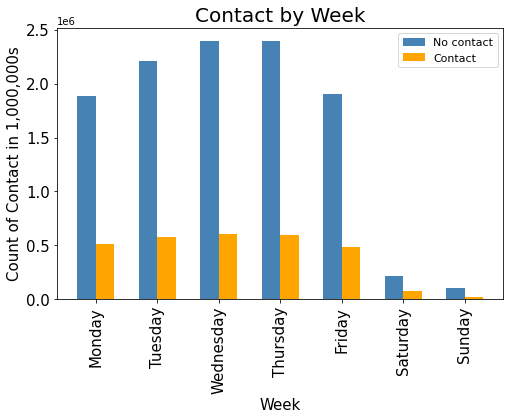

In [113]:
# count of contact or no contact by Purpose by WEEK 
df_contactwk = df[["contact", "dayofweek"]]

y1 = df_contactwk[df.contact==False].groupby('dayofweek').count().reset_index()
y2 =  df_contactwk[df.contact==True].groupby('dayofweek').count().reset_index()
width = 0.3


# y1 = list(y1.sale)
# y2 = list(y2.sale)
y1.rename(columns = {"contact": "nocontact"}, inplace= True)
y1.rename(columns = {"contact": "contact"}, inplace= True)
y = pd.merge(y1, y2, how = "outer")

y = y.fillna(0)

x = list(y.dayofweek)
x = tuple(days)
y1 = list(y.nocontact)
y2 = list(y.contact)

index= np.arange(len(y.index))

fig = plt.figure(figsize = (8,5))

ax = fig.add_subplot(111)

ax.bar(index, y1, width=width, color = 'steelblue', label = 'No contact')
ax.bar(index+width, y2, width=width, color = 'orange', label = 'Contact')

fig.savefig('fig6.png')

plt.title("Contact by Week", fontsize = 20)

ax.set_xlabel('Week',fontsize =15)
ax.set_ylabel('Count of Contact in 1,000,000s',fontsize =15)
ax.set_xticks(index+width/2)
ax.set_xticklabels(x, rotation = "vertical")
ax.legend(fontsize =11)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show()

In [99]:
y1 = df[df.contact == False]['contact'].count()
y2 = df[df.contact == True]['contact'].count()
y3 = df[df.sale == False]['sale'].count()
y4 = df[df.sale == True]['sale'].count()


k1 = list([y2, y1])
k2 = list([y4, y3])
x1 = list(["Contact", "No Contact"]) 
x2 = list(["Sale", "No Sale"])

x=x1+x2
print(k1)
print(k2)
width = 0.3

fig = plt.figure(figsize = (8, 5))

ax = fig.add_subplot(111)

ax.bar(x1, k1, width=width, color = 'steelblue', label = 'Contact/No Contact')
ax.bar(x2, k2, width=width, color = 'lightcoral', label = 'Sale/No Sale')

plt.title("Counts per class", fontsize = 20)

ax.set_xlabel('Call outcome',fontsize = 15)
ax.set_ylabel('Count of Sales',fontsize = 15)
ax.set_xticklabels(x)
ax.legend(plt.xticks(fontsize = 15)

plt.show()


SyntaxError: invalid syntax (<ipython-input-99-67fa3675f402>, line 31)

In [ ]:
fig = plt.figure(figsize = (8,5))
plt.hist(df.lengthinmin, density=True, bins=20, range=[0,2], color = "steelblue")
plt.xlabel("Length of call (in minutes)", fontsize = 16)
plt.ylabel("Frequency",  fontsize = 16)
plt.title("Call Length",  fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

[2879757, 11101151]
[323243, 13657665]


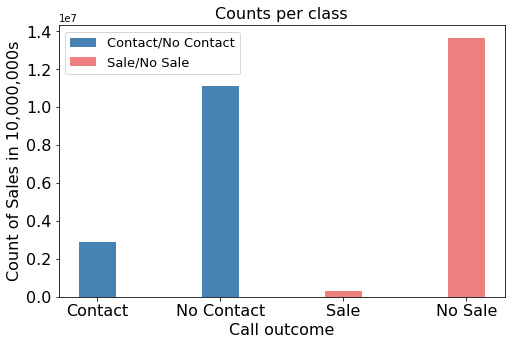

In [109]:
y1 = df[df.contact == False]['contact'].count()
y2 = df[df.contact == True]['contact'].count()
y3 = df[df.sale == False]['sale'].count()
y4 = df[df.sale == True]['sale'].count()


k1 = list([y2, y1])
k2 = list([y4, y3])
x1 = list(["Contact", "No Contact"]) 
x2 = list(["Sale", "No Sale"])

x=x1+x2
print(k1)
print(k2)
width = 0.3

fig = plt.figure(figsize = (8, 5))

ax = fig.add_subplot(111)

ax.bar(x1, k1, width=width, color = 'steelblue', label = 'Contact/No Contact')
ax.bar(x2, k2, width=width, color = 'lightcoral', label = 'Sale/No Sale')

plt.title("Counts per class",fontsize = 16)

ax.set_xlabel('Call outcome',fontsize = 16)
ax.set_ylabel('Count of Sales in 10,000,000s',fontsize = 16)
ax.set_xticklabels(x)
ax.legend(fontsize = 13)

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plt.show()

fig.savefig('fig9.png')